### 6. Subject Disease Milestones (sm.csv) - [One record per Disease Milestone per subject]

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# Load subject disease milestones .csv file
possible_paths = [
    'C:/Users/lenne/OneDrive/Documenten/Master of Statistics and Data Science/2023-2024/Master thesis/MSOAC Placebo Data',
    'C:/Users/anaso/Desktop/SOFIA MENDES/KU Leuven/Master Thesis/MSOAC Placebo dataset/csv files'
]

file_name = 'sm.csv'
file_path = next(f'{path}/{file_name}' for path in possible_paths if os.path.exists(f'{path}/{file_name}'))
# Create data frame
milestones = pd.read_csv(file_path)

# Sort by the 'USUBJID' and 'SMSEQ' columns in ascending order
milestones = milestones.sort_values(by=['USUBJID', 'SMSEQ'], ascending=True)
milestones

,STUDYID,DOMAIN,USUBJID,SMSEQ,SMSTDY,SMENDY,SMENRF,MIDS,MIDSTYPE
222,MSOAC,SM,MSOAC/0031,1,268.0,279.0,NaN,MS RELAPSE 1,MULTIPLE SCLEROSIS RELAPSE EVENT
57,MSOAC,SM,MSOAC/0031,2,814.0,NaN,NaN,MS RELAPSE 2,MULTIPLE SCLEROSIS RELAPSE EVENT
683,MSOAC,SM,MSOAC/0035,1,144.0,NaN,NaN,MS RELAPSE 1,MULTIPLE SCLEROSIS RELAPSE EVENT
421,MSOAC,SM,MSOAC/0035,2,221.0,NaN,NaN,MS RELAPSE 2,MULTIPLE SCLEROSIS RELAPSE EVENT
1287,MSOAC,SM,MSOAC/0044,1,414.0,NaN,NaN,MS RELAPSE 1,MULTIPLE SCLEROSIS RELAPSE EVENT
...,...,...,...,...,...,...,...,...,...
797,MSOAC,SM,MSOAC/9995,1,142.0,NaN,NaN,MS RELAPSE 1,MULTIPLE SCLEROSIS RELAPSE EVENT
996,MSOAC,SM,MSOAC/9995,2,555.0,NaN,NaN,MS RELAPSE 2,MULTIPLE SCLEROSIS RELAPSE EVENT
1039,MSOAC,SM,MSOAC/9998,1,79.0,NaN,NaN,MS RELAPSE 1,MULTIPLE SCLEROSIS RELAPSE EVENT
272,MSOAC,SM,MSOAC/9999,1,69.0,NaN,NaN,MS RELAPSE 1,MULTIPLE SCLEROSIS RELAPSE EVENT


Number of patients

In [4]:
unique_count = milestones['USUBJID'].nunique()
print(f"The number of unique values in USUBJID: {unique_count}")

The number of unique values in USUBJID: 853


Check how many missing values per column

In [5]:
missing_percentage_sm = (milestones.isnull().sum() / len(milestones)) * 100
missing_milestones = pd.DataFrame({'Column Name': missing_percentage_sm.index, 'Missing Percentage': missing_percentage_sm.values})
missing_milestones = missing_milestones.sort_values(by='Missing Percentage', ascending=False)
print(missing_milestones)

  Column Name  Missing Percentage
6      SMENRF           99.469496
5      SMENDY           57.294430
4      SMSTDY            1.989390
0     STUDYID            0.000000
1      DOMAIN            0.000000
2     USUBJID            0.000000
3       SMSEQ            0.000000
7        MIDS            0.000000
8    MIDSTYPE            0.000000


Drop column with more than 90% and others, namely:
- **STUDYID**: Study Identifier (irrelevant)
- **DOMAIN**: Domain Abbreviation (irrelevant)
- **SMSEQ**: Sequence Number (gives same info as MIDS, in this dataset it does not add anything) -- *maybe keep because it might be used as a merging variable with ID*
- **SMENRF**: Study Day of End of Milestone (almost all missing, but should I leave it the dataset?) !!!!!!
- **MIDSTYPE**: Disease Milestone Type (gives same info as MIDS)

In [6]:
columns_to_drop = ['STUDYID','DOMAIN','SMSEQ','SMENRF','MIDSTYPE']
milestones = milestones.drop(columns_to_drop, axis=1)
milestones

,USUBJID,SMSTDY,SMENDY,MIDS
222,MSOAC/0031,268.0,279.0,MS RELAPSE 1
57,MSOAC/0031,814.0,NaN,MS RELAPSE 2
683,MSOAC/0035,144.0,NaN,MS RELAPSE 1
421,MSOAC/0035,221.0,NaN,MS RELAPSE 2
1287,MSOAC/0044,414.0,NaN,MS RELAPSE 1
...,...,...,...,...
797,MSOAC/9995,142.0,NaN,MS RELAPSE 1
996,MSOAC/9995,555.0,NaN,MS RELAPSE 2
1039,MSOAC/9998,79.0,NaN,MS RELAPSE 1
272,MSOAC/9999,69.0,NaN,MS RELAPSE 1


- Descriptive statistics for continuous variables (SMSTDY)

In [7]:
continuous_columns_ms = ['SMSTDY','SMENDY']

descriptive_continuous_ms = {
    'Count': milestones[continuous_columns_ms].count(), #cases that are not missing
    'Missing Cases': milestones[continuous_columns_ms].isna().sum(),
    'Mean': milestones[continuous_columns_ms].mean(),
    'Standard Deviation': milestones[continuous_columns_ms].std()
}

cont_milestones = pd.DataFrame(descriptive_continuous_ms)
print(cont_milestones)

        Count  Missing Cases        Mean  Standard Deviation
SMSTDY   1478             30  395.510149          303.959886
SMENDY    644            864  338.309006          223.011404


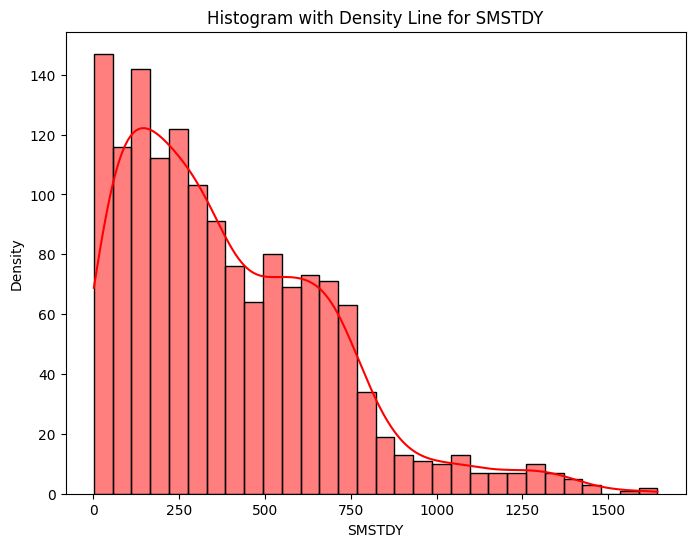

In [8]:
SMSTDY = milestones['SMSTDY'].dropna()

plt.figure(figsize=(8, 6))
sns.histplot(SMSTDY, kde=True, color='red', bins=30)
plt.xlabel('SMSTDY')
plt.ylabel('Density')
plt.title('Histogram with Density Line for SMSTDY')
plt.show() # more or less normaly distributed

In [9]:
summary_stats = SMSTDY.describe()
summary_stats

count    1478.000000
mean      395.510149
std       303.959886
min         1.000000
25%       153.000000
50%       327.000000
75%       591.000000
max      1644.000000
Name: SMSTDY, dtype: float64

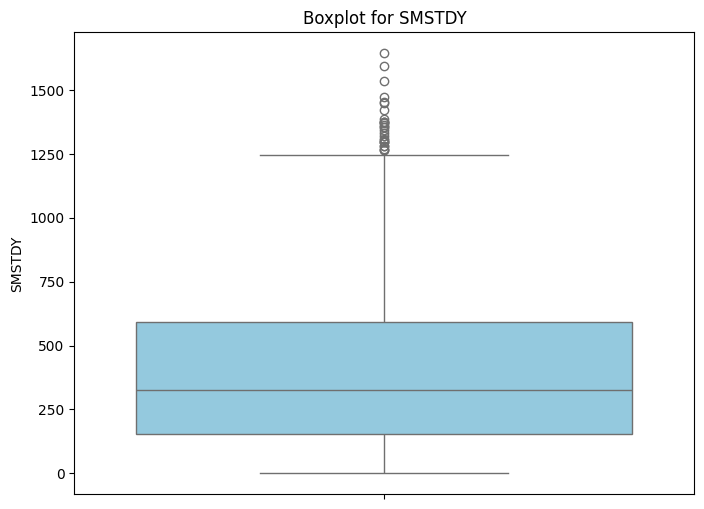

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=SMSTDY, color='skyblue')
plt.ylabel('SMSTDY')
plt.title('Boxplot for SMSTDY')
plt.show()

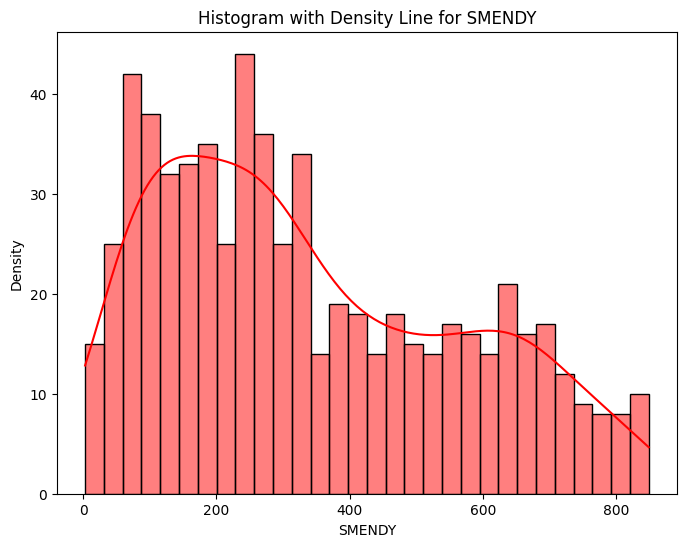

In [11]:
SMENDY = milestones['SMENDY'].dropna()

plt.figure(figsize=(8, 6))
sns.histplot(SMENDY, kde=True, color='red', bins=30)
plt.xlabel('SMENDY')
plt.ylabel('Density')
plt.title('Histogram with Density Line for SMENDY')
plt.show() # more or less normaly distributed

In [12]:
summary_stats = SMENDY.describe()
summary_stats

count    644.000000
mean     338.309006
std      223.011404
min        3.000000
25%      154.750000
50%      282.500000
75%      511.000000
max      849.000000
Name: SMENDY, dtype: float64

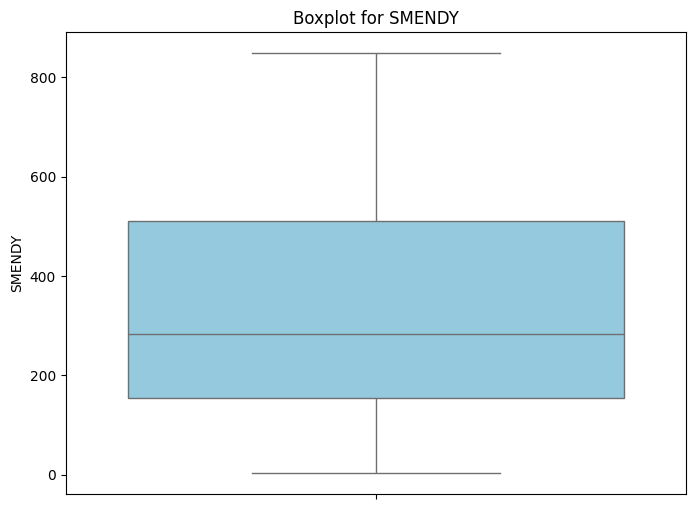

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=SMENDY, color='skyblue')
plt.ylabel('SMENDY')
plt.title('Boxplot for SMENDY')
plt.show()

- Descriptive statistics for categorical variables

In [14]:
categorical_columns_ms = ['MIDS']

descriptive_categorical_ms = {}
for col in categorical_columns_ms:
    descriptive_categorical_ms[col] = {
        'Count': milestones[col].count(),
        'Missing Cases': milestones[col].isna().sum(),
        'Unique Values': milestones[col].nunique(),
        'Mode': milestones[col].mode().values[0],
        'Mode Frequency': milestones[col].value_counts().max()
    }

cat_milestones = pd.DataFrame(descriptive_categorical_ms).T
print(cat_milestones)

     Count Missing Cases Unique Values          Mode Mode Frequency
MIDS  1508             0             9  MS RELAPSE 1            853


- number of observations for each MIDS category

In [15]:
# MIDS
mids_counts_milestones = milestones['MIDS'].value_counts().reset_index()
mids_counts_milestones.columns = ['MIDS', 'Count']
total_count = mids_counts_milestones['Count'].sum()
mids_counts_milestones['Percentage'] = (mids_counts_milestones['Count'] / total_count) * 100
print(mids_counts_milestones)

           MIDS  Count  Percentage
0  MS RELAPSE 1    853   56.564987
1  MS RELAPSE 2    368   24.403183
2  MS RELAPSE 3    157   10.411141
3  MS RELAPSE 4     75    4.973475
4  MS RELAPSE 5     36    2.387268
5  MS RELAPSE 6     14    0.928382
6  MS RELAPSE 7      3    0.198939
7  MS RELAPSE 8      1    0.066313
8  MS RELAPSE 9      1    0.066313


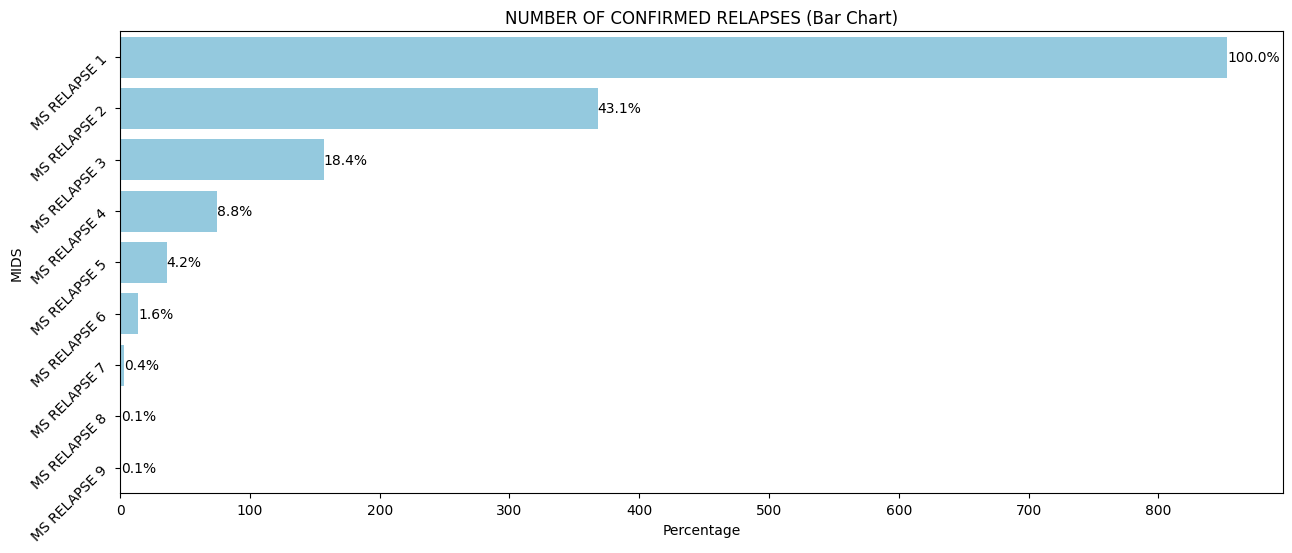

In [25]:
# Drop missing values from the 'MIDS' column
MIDS = milestones['MIDS'].dropna()

plt.figure(figsize=(15, 6))

# Plot
ax = sns.countplot(y=MIDS, color='skyblue')  

# Adding percentages to the bars
total = 853
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    x = p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), ha='left', va='center')

# Rotate the x-axis labels
plt.yticks(rotation=45)

plt.ylabel('MIDS')
plt.xlabel('Percentage')
plt.title('NUMBER OF CONFIRMED RELAPSES (Bar Chart)')

#Save fig
plt.savefig('../assets/milestones_mids.png', bbox_inches='tight')

plt.show()
plt.close()


What matters in fact is how many relapses each patient had in total. Therefore, we can create a df with one row per patient with the total number of relapses.
We also keep SMSTDY, but only the starting day of the FIRST relapse

In [16]:
milestones['Number'] = milestones['MIDS'].str.extract(r'(\d+)').astype(int)
milestones['NRELAP'] = milestones.groupby('USUBJID')['Number'].transform('max')
milestones = milestones.drop(['MIDS', 'Number', 'SMENDY'], axis=1)

milestones

,USUBJID,SMSTDY,NRELAP
222,MSOAC/0031,268.0,2
57,MSOAC/0031,814.0,2
683,MSOAC/0035,144.0,2
421,MSOAC/0035,221.0,2
1287,MSOAC/0044,414.0,1
...,...,...,...
797,MSOAC/9995,142.0,2
996,MSOAC/9995,555.0,2
1039,MSOAC/9998,79.0,1
272,MSOAC/9999,69.0,2


Final Dataset

In [17]:
milestones_final = milestones.groupby('USUBJID').first().reset_index() # we keep the first row for each patient, which shows the starting day of the first relapse
milestones_final

,USUBJID,SMSTDY,NRELAP
0,MSOAC/0031,268.0,2
1,MSOAC/0035,144.0,2
2,MSOAC/0044,414.0,1
3,MSOAC/0046,275.0,1
4,MSOAC/0050,217.0,1
...,...,...,...
848,MSOAC/9951,90.0,2
849,MSOAC/9962,394.0,1
850,MSOAC/9995,142.0,2
851,MSOAC/9998,79.0,1


In [18]:
# Missing percentages static dataframe
missing_percentage_sm = (milestones_final.isnull().sum() / len(milestones_final)) * 100
missing_milestones = pd.DataFrame({'Column Name': missing_percentage_sm.index, 'Missing Percentage': missing_percentage_sm.values})
missing_milestones = missing_milestones.sort_values(by='Missing Percentage', ascending=False)
print(missing_milestones)

  Column Name  Missing Percentage
1      SMSTDY            1.992966
0     USUBJID            0.000000
2      NRELAP            0.000000


In [19]:
folder_name = 'new_data'

possible_paths = [
    'C:/Users/lenne/OneDrive/Documenten/Master of Statistics and Data Science/2023-2024/Master thesis/Thesis_Sofia_Lennert',
    'C:/Users/anaso/Desktop/SOFIA MENDES/KU Leuven/Master Thesis/Thesis_Sofia_Lennert'
]

for path in possible_paths:
    if os.path.exists(path):
        folder_path = os.path.join(path, folder_name)
        if not os.path.exists(folder_path):  # Check if the folder doesn't exist
            try:
                os.makedirs(folder_path)
                break  # Exit the loop if folder creation is successful
            except PermissionError:
                print(f"Warning: Unable to create '{folder_name}' folder in {path}.")
        else:
            print(f"Folder '{folder_name}' already exists in {path}.")
else:
    print("Unable to create the folder in any of the specified paths.")

# Specify the path for the CSV file
csv_file_path = os.path.join(folder_path, 'SM_agg.csv')

# Save the DataFrame to CSV
milestones_final.to_csv(csv_file_path, index=False)